# L11 Generalized Lotka Volterra

This notebook can be run from either the CSB2 or CSB3 environment. Depending on the environment you will need to run the appropriate code cell to load the gLV models. With CSB3 you can load the .xml (SBML) models that come directly from the original publication. With CSB2 you can load the .npy (numpy) models, which are also provided for convenience.

## Overview

The generlized Lotka Volterra model is a general version of the original predator prey model that can be applied to model interacting communities of organisms with any number of organisms and types of interactions. In this notebook we will explore this model in the context of modeling a synthetic community of microbial organisms from the human gut microbiome, following the work of [Venturelli et al.](https://www.embopress.org/doi/full/10.15252/msb.20178157)


In [ ]:
%reset

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### The Generalized Lotka Volterra Equation

$\large \frac{dx_i}{dt} = x_i(\mu_i+\sum_{j=1}^{n}\alpha_{ij}x_j)$

Where $x_i$ are the species densities, $\mu_i$ are the species growth rates, and $\alpha_{ij}$ are the interaction coefficients, with $i=j$ representing intraspecies (self) interactions.

We can also write this equation in matrix form as:

$\large \frac{dx}{dt} = x \odot (\mu + \alpha \cdot x)$

Where  $\frac{dx}{dt}$ is a vector representing the rate of change of all $n$ organisms, $x$ is a vector of the organism densities, $\mu$ is a vector of $n$ growth rates, and $\alpha$ is a matrix of $n$ x $n$ interaction coefficients. Thus, for any given value of $n$, there are $(n^2+n)$ total parameters in this model.

The operations used here are: $\odot$ representing the element-wise or Hadamard product, and $\cdot$ representing matrix multiplication.

We can relate this general equation to the specific form of the predator prey dynamics. The predator prey equations are re-written below in a similar form to the above general equation.

$\large \frac{dx_1}{dt} = x_1(a - bx_2)$ (prey)

$\large \frac{dx_2}{dt} = x_2(-c + dx_1)$ (predator)

#### QUESTION 1
1. Using the parameters from the equation above for the original Lotka Volterra predator/prey model, provide the values for the generalized parameters $\mu$ and $\alpha$ that  give rise to the original model?
   * a. Provide the values of $\mu$ as a vector.
   * b. Provide the values of $\alpha$ as a matrix.

### Computational Model

Now that we have a bit of an intuition for the generalized model, we will implement this general differential equation computationally. We can then simulate the dynamics of any theoretical ecological system using numerical integration.

In [2]:
# Define Function (matrix form)
def gLV_dynamics(t,y,n,mu,alpha):
    #y = species (n total)
    dydt = np.zeros(n)
    
    # vectorized form of gLV model
    dydt = y*(mu+np.matmul(alpha,y))
    
    return dydt

In [ ]:
# Define Function (non-matrix form)
def gLV1_dynamics(t,y,n,mu,alpha):
    #y = species (n total)
    dydt = np.zeros(n)
    
    for i in range(n):
        s = 0 #sum
        for j in range(n):
            s = s + alpha[i,j]*y[j]
        
        dydt[i] = y[i]*(mu[i]+s)

    return dydt

Let's start by simulating the predator prey dynamics to check our implementation.

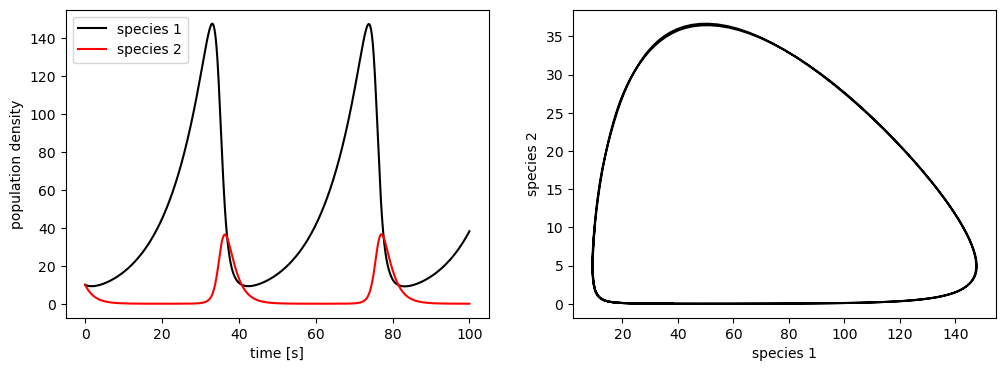

In [3]:
# Define Parameters

n = 2
a = 0.1
b = 0.02
c = 0.5
d = 0.01

mu = np.array([a,-c])
alpha = np.array([[0, -b],[d, 0]])

# Initial Conditions
y0 = [10,10]
# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(gLV_dynamics,tspan,y0, t_eval=t, args=(n,mu,alpha))

# plot dynamics
[fig,axs] = plt.subplots(1,2,figsize=[12,4])
axs[0].plot(ode_sol.t,ode_sol.y[0],'k-')
axs[0].plot(ode_sol.t,ode_sol.y[1],'r-')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('population density')
axs[0].legend(['species 1','species 2'])

axs[1].plot(ode_sol.y[0],ode_sol.y[1],'k-');
axs[1].set_xlabel('species 1')
axs[1].set_ylabel('species 2');



### Bistable Interaction
In Venturelli et al. they show that some pairwise interactions exhibit bistability. They found this by inoculating the two species at different relative abundances (95% of species 1 and 5% of species 2 or visa versa) and obsering history dependence on the steady-state relative abundances. An example from the paper is shown below with the two organisms Prevotella capri (PC) and Desulfovibrio piger (DP):

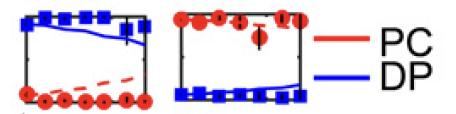

We will simulate a system of pairwise interacting organisms and change the initial conditions to see if we can observe this phenomena. The code below implements a simulation for two organisms starting with 95/5% of each.


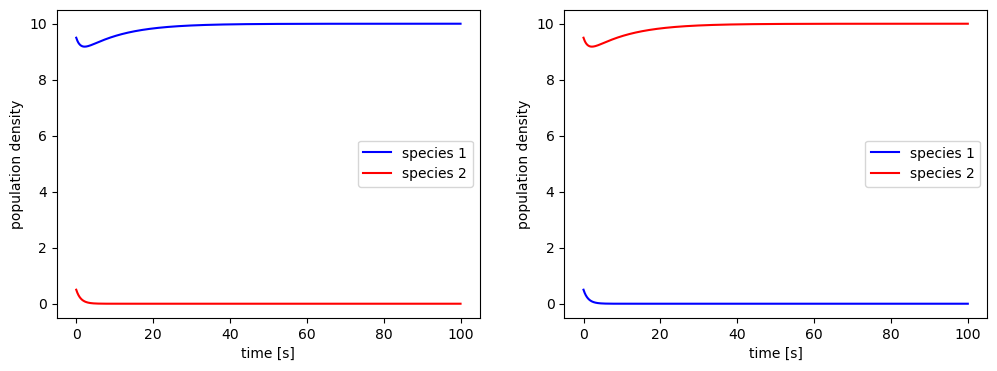

In [10]:
[fig,axs] = plt.subplots(1,2,figsize=[12,4])

# Define Parameters
n = 2
mu = np.array([0.1,0.1])
alpha_ = np.array([[-0.01, -0.1],
                  [0.1, -0.01]])
alpha = np.array([[-.01, -.1],
                  [-0.1, -.01]])

y_0_total = 10
y0 = [y_0_total*0.95,y_0_total*0.05]
# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,alpha))

# plot dynamics
axs[0].plot(ode_sol.t,ode_sol.y[0],'b-')
axs[0].plot(ode_sol.t,ode_sol.y[1],'r-')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('population density')
axs[0].legend(['species 1','species 2'])

y0 = [y_0_total*0.05,y_0_total*0.95]
# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,alpha))

# plot dynamics
axs[1].plot(ode_sol.t,ode_sol.y[0],'b-')
axs[1].plot(ode_sol.t,ode_sol.y[1],'r-')
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel('population density')
axs[1].legend(['species 1','species 2']);



#### QUESTION 2:
2. Adjust the parameters for the interaction to simulate dynamics for a pair of organisms that exhibit history dependence (bistability). Hint: only change the parameters corresponding to the inter-species interaction $\alpha_{1,2}$ and $\alpha_{2,1}$.
   * a. Include the two plots showing they dynamics of the community when starting with different amounts of the two species.
   * b. Explain the adjustment you made.

### Simplified Gut Microbiome Community

In Venturelli et al, the generalized Lotka-Volterra model is used to describe a 12 member synthetic microbial community that is made up of bacterial isolates from the human gut microbiome.

The species and their associations with different diseases are described in table 1 of the paper, and a phylogenetic tree relating the organisms is shown in Figure 1A:

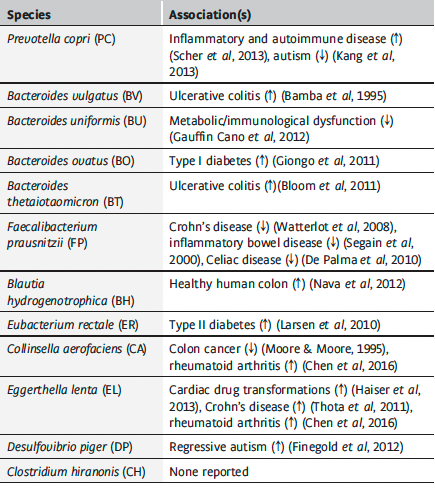
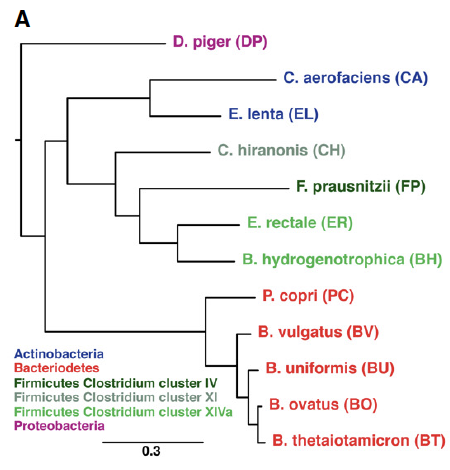


#### Load Models

The code below provides two options to load the models:
* Option 1: Load the models from the original paper using SBML (uses CSB3)
* Option 2: Load the models from pre-saved numpy arrays (uses CSB2)

The generalized lotka volterra models for this community are obtained by inferring the model parameters from several different sets of data. The training data sets used are:
* T1 - fit to monoculture (M) data only
* T2 - fit to M and equal inoculum pairwise data (PW1)
* T3 - fit to M, PW1, and unequal inoculum pairwise data (PW2)
* T4 - fit to M, PW1, PW2, and full 12-member community data

We will load 4 different models here (M1-4), each fit to a different set of training data (T1-4). Each of these models (and their associated parameters) are available online alongside the paper:
* https://jjj.bio.vu.nl/models/?id=venturelli
* They are also provided in the Models folder accompanying this notebook or the Model_np folder as pre-processed numpy arrays

In [11]:
#### OPTION 1 ####
# We will load the sbml models and then do some text parsing to get the parameters into the growth rate vector and interaction matrix that we want.
from libsbml import *

# List of organisms in phylogenetic order:
orgs = np.array(['BT','BO','BU','BV','PC','BH','ER','FP','CH','EL','CA','DP']) #phylogenetic

# Load Model 1
mu_1 = np.zeros([12])
alpha_1 = np.zeros([12,12])
reader = SBMLReader()
document = reader.readSBMLFromFile("Models/venturelli1.xml")
model = document.getModel()
for i in range(len(model.parameters)): #loop through parameters
    tmp1 = model.parameters[i].id
    tmp2 = model.parameters[i].value
    if tmp1[0]=='a': #alpha matrix parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        ind2 = np.argwhere(orgs==tmp1[3:5])[0][0]
        alpha_1[ind1,ind2]=tmp2
    if tmp1[0]=='u': #mu vector parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        mu_1[ind1]=tmp2

# Load Model 2
mu_2 = np.zeros([12])
alpha_2 = np.zeros([12,12])
reader = SBMLReader()
document = reader.readSBMLFromFile("Models/venturelli2.xml")
model = document.getModel()
for i in range(len(model.parameters)): #loop through parameters
    tmp1 = model.parameters[i].id
    tmp2 = model.parameters[i].value
    if tmp1[0]=='a': #alpha matrix parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        ind2 = np.argwhere(orgs==tmp1[3:5])[0][0]
        alpha_2[ind1,ind2]=tmp2
    if tmp1[0]=='u': #mu vector parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        mu_2[ind1]=tmp2
        
# Load Model 3
mu_3 = np.zeros([12])
alpha_3 = np.zeros([12,12])
reader = SBMLReader()
document = reader.readSBMLFromFile("Models/venturelli3.xml")
model = document.getModel()
for i in range(len(model.parameters)): #loop through parameters
    tmp1 = model.parameters[i].id
    tmp2 = model.parameters[i].value
    if tmp1[0]=='a': #alpha matrix parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        ind2 = np.argwhere(orgs==tmp1[3:5])[0][0]
        alpha_3[ind1,ind2]=tmp2
    if tmp1[0]=='u': #mu vector parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        mu_3[ind1]=tmp2

# Load Model 4
mu_4 = np.zeros([12])
alpha_4 = np.zeros([12,12])
reader = SBMLReader()
document = reader.readSBMLFromFile("Models/venturelli4.xml")
model = document.getModel()
for i in range(len(model.parameters)): #loop through parameters
    tmp1 = model.parameters[i].id
    tmp2 = model.parameters[i].value
    if tmp1[0]=='a': #alpha matrix parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        ind2 = np.argwhere(orgs==tmp1[3:5])[0][0]
        alpha_4[ind1,ind2]=tmp2
    if tmp1[0]=='u': #mu vector parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        mu_4[ind1]=tmp2

In [ ]:
#### OPTION 2 ####
# Load model parameters directly from numpy arrays

# List of organisms in phylogenetic order:
orgs = np.array(['BT','BO','BU','BV','PC','BH','ER','FP','CH','EL','CA','DP']) #phylogenetic

mu_1 = np.load('Models_np/mu_1.npy')
mu_2 = np.load('Models_np/mu_2.npy')
mu_3 = np.load('Models_np/mu_3.npy')
mu_4 = np.load('Models_np/mu_4.npy')
alpha_1 = np.load('Models_np/alpha_1.npy')
alpha_2 = np.load('Models_np/alpha_2.npy')
alpha_3 = np.load('Models_np/alpha_3.npy')
alpha_4 = np.load('Models_np/alpha_4.npy')


#### Interaction Matrices $\alpha$

We can gain some insight into these models by visualizing the interaction matrices. Below we will use the matplotlib imshow function to visualize the $\alpha$ matrices for the 4 models. These figures show the model fit interactions between the organisms, with the $i_{th}$ organism shown in the row and the $j_{th}$ organism shown in the column (I.E. they show the column organism's impact on the growth of the row organism).


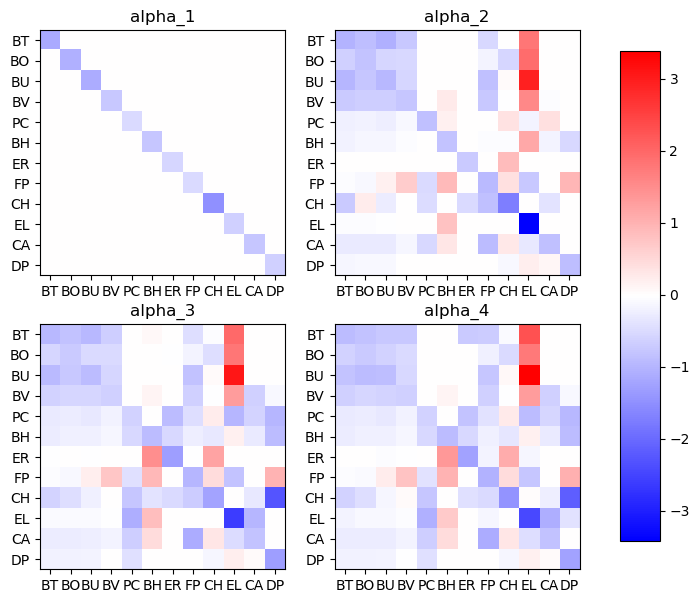

In [12]:
[fig,axs] = plt.subplots(2,2,figsize=[8,7])

minval = np.min([alpha_1,alpha_2,alpha_3,alpha_4])
maxval = np.max([alpha_1,alpha_2,alpha_3,alpha_4])

axs[0,0].imshow(alpha_1,cmap="bwr", vmin=minval, vmax=maxval)
axs[0,0].set_title('alpha_1')
axs[0,0].set_xticks(range(12))
axs[0,0].set_xticklabels(orgs)
axs[0,0].set_yticks(range(12))
axs[0,0].set_yticklabels(orgs)

axs[0,1].imshow(alpha_2,cmap="bwr", vmin=minval, vmax=maxval)
axs[0,1].set_title('alpha_2')
axs[0,1].set_xticks(range(12))
axs[0,1].set_xticklabels(orgs)
axs[0,1].set_yticks(range(12))
axs[0,1].set_yticklabels(orgs)

axs[1,0].imshow(alpha_3,cmap="bwr", vmin=minval, vmax=maxval)
axs[1,0].set_title('alpha_3')
axs[1,0].set_xticks(range(12))
axs[1,0].set_xticklabels(orgs)
axs[1,0].set_yticks(range(12))
axs[1,0].set_yticklabels(orgs)

im=axs[1,1].imshow(alpha_4,cmap="bwr", vmin=minval, vmax=maxval)
axs[1,1].set_title('alpha_4');
axs[1,1].set_xticks(range(12))
axs[1,1].set_xticklabels(orgs)
axs[1,1].set_yticks(range(12))
axs[1,1].set_yticklabels(orgs);

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

#### QUESTION 3:
3. Briefly explain the $\alpha$ matrices from the plots above.
   * a. What is the difference between the $\alpha_1$ matrix and the other matrices?
   * b. Describe at least one feature that stands out in the $\alpha_4$ matrix? (this feature may also apply to the other matrices)

### Simulating Dynamics

Now let's simulate the dynamics of the full community. We will use the parameters from T3 for the simulations, as is done in most of the paper.

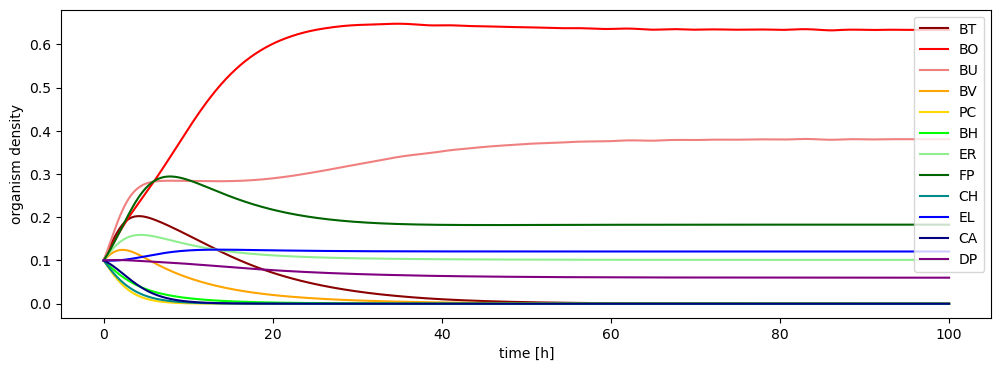

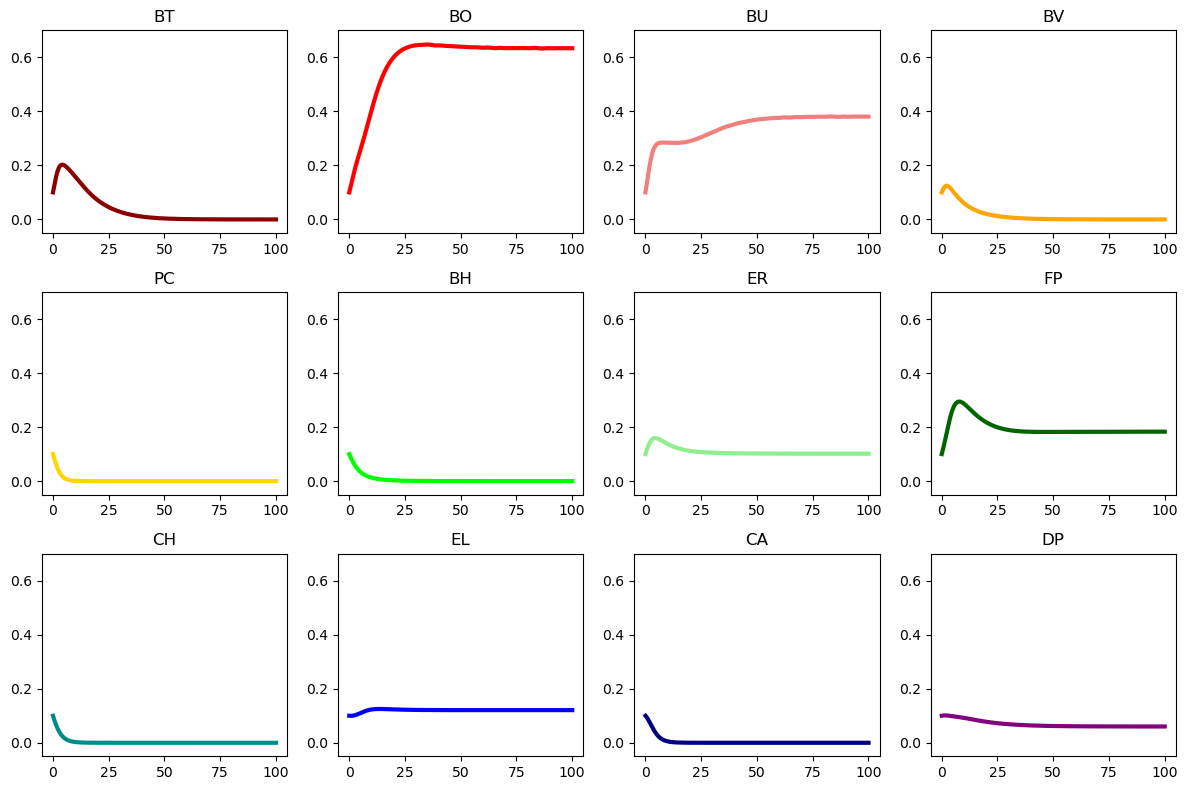

In [24]:
# Define Parameters
n = 12
mu = mu_3
alpha = alpha_3

y0 = 0.1*np.ones(n) + np.random.rand(1)*0.001 #equal initial abundance w/ some noise
# y0.append(0)
# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,alpha))

# Plot all
[fig,axs] = plt.subplots(1,1,figsize=[12,4])
colors = ['darkred','red','lightcoral','orange','gold',
          'lime','lightgreen',
          'darkgreen',
          'darkcyan',
          'blue','navy',
          'purple']
for i in range(n):
    axs.plot(ode_sol.t,ode_sol.y[i],color=colors[i])
axs.legend(orgs)
axs.set_ylabel('organism density')
axs.set_xlabel('time [h]');

# Plot all separately
[fig,axs] = plt.subplots(3,4,figsize=[12,8])
for i in range(n):
    i1 = int(np.floor(i/4))
    i2 = int(np.mod(i,4))
    axs[i1,i2].plot(ode_sol.t,ode_sol.y[i],'-',color=colors[i],linewidth=3)
    axs[i1,i2].set_title(orgs[i])
    axs[i1,i2].tick_params(axis='both', which='major', labelsize=10)
    axs[i1,i2].set_ylim([-0.05, 0.7])

fig.tight_layout()

#### QUESTION 4:
4. Remove the Eggerthella lenta (EL) organism from the community by setting its initial popultion density to 0.
   * a. Plot the dynamics of this simulation on top of the dynamics from the full community (above).
   * b. Provide a brief description of how the dynamics changed.

[0.10074964 0.10074964 0.10074964 0.10074964 0.10074964 0.10074964
 0.10074964 0.10074964 0.10074964 0.10074964 0.10074964 0.10074964]


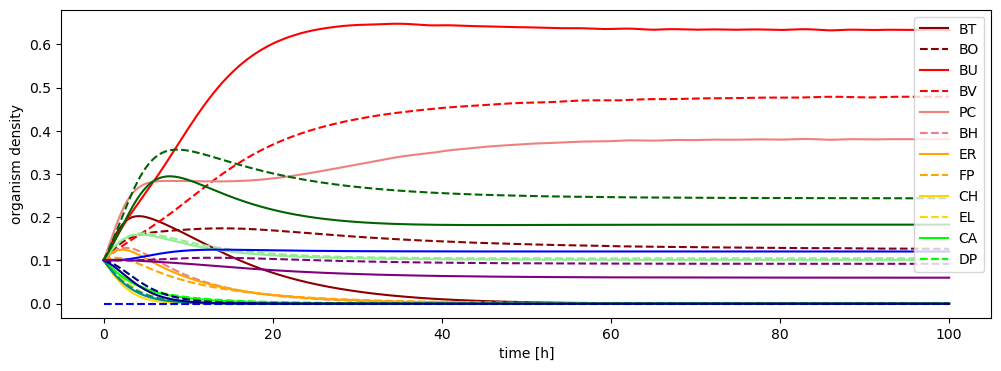

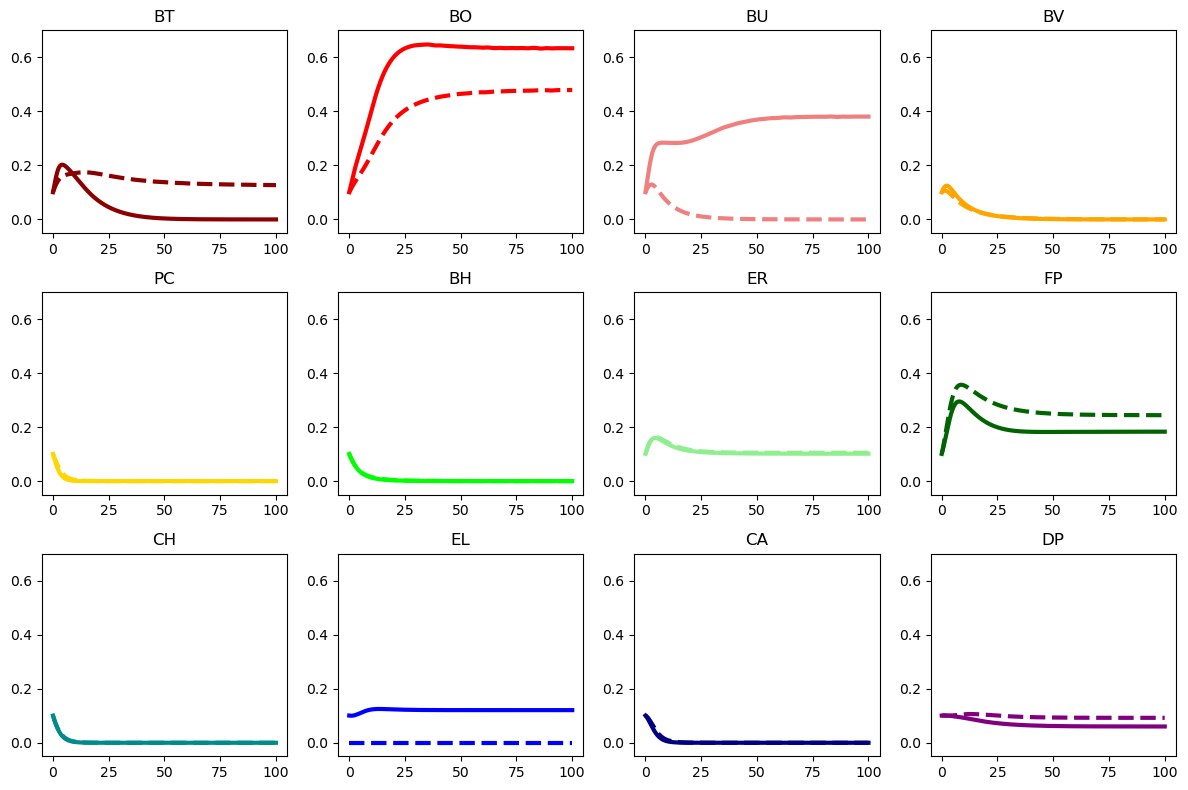

In [40]:
# Define Parameters
n = 12
mu = mu_3
alpha = alpha_3

y0 = 0.1*np.ones(n) + np.random.rand(1)*0.001 #equal initial abundance w/ some noise
print(y0)

# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,alpha))
y0[-3]=0
ode_sol2 = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,alpha))


# Plot all
[fig,axs] = plt.subplots(1,1,figsize=[12,4])
colors = ['darkred','red','lightcoral','orange','gold',
          'lime','lightgreen',
          'darkgreen',
          'darkcyan',
          'blue','navy',
          'purple']
for i in range(n):
    axs.plot(ode_sol.t,ode_sol.y[i],color=colors[i])
    axs.plot(ode_sol2.t,ode_sol2.y[i],'--', color= colors[i])

axs.legend(orgs)
axs.set_ylabel('organism density')
axs.set_xlabel('time [h]');

# Plot all separately
[fig,axs] = plt.subplots(3,4,figsize=[12,8])
for i in range(n):
    i1 = int(np.floor(i/4))
    i2 = int(np.mod(i,4))
    axs[i1,i2].plot(ode_sol.t,ode_sol.y[i],'-',color=colors[i],linewidth=3)
    axs[i1,i2].plot(ode_sol2.t,ode_sol2.y[i],'--',color=colors[i],linewidth=3)
    axs[i1,i2].set_title(orgs[i])
    axs[i1,i2].tick_params(axis='both', which='major', labelsize=10)
    axs[i1,i2].set_ylim([-0.05, 0.7])

fig.tight_layout()

#### QUESTION 5:
5. Compare the simulated dynamics for the different models.
   * a. Simulate the dynamics with the T4 model (full community data) by chaning the $\mu$ and $\alpha$ parameters. Plot these dynamics on top of the T3 dynamics (above).
   * b. Provide a brief description of how the dynamics changed.
   * c. What does this tell us about the value of pair-wise interaction measurements for representing the full community dynamics?


[0.10032056 0.10032056 0.10032056 0.10032056 0.10032056 0.10032056
 0.10032056 0.10032056 0.10032056 0.10032056 0.10032056 0.10032056]


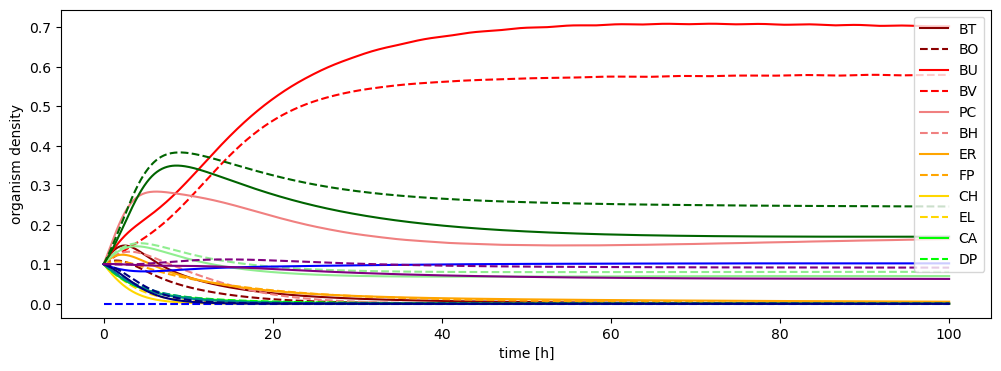

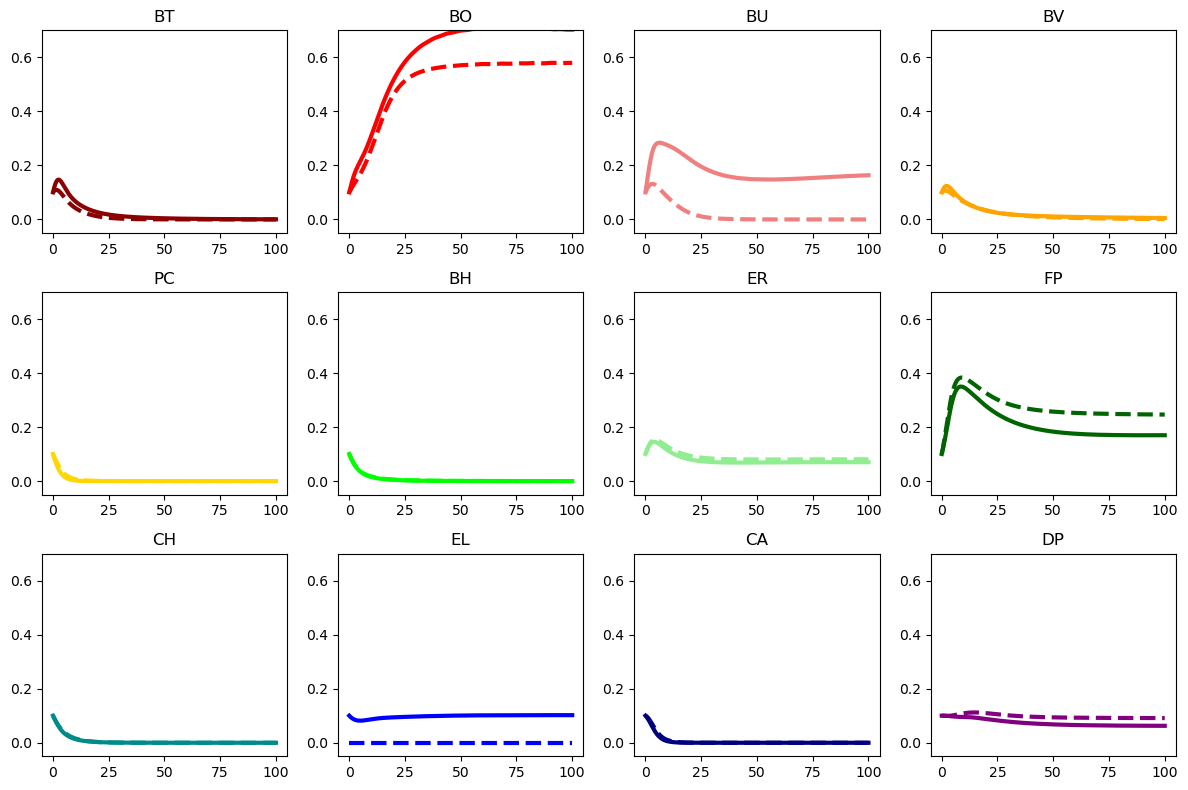

In [41]:
# Define Parameters
n = 12
mu = mu_4
alpha = alpha_4

y0 = 0.1*np.ones(n) + np.random.rand(1)*0.001 #equal initial abundance w/ some noise
print(y0)

# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,alpha))
y0[-3]=0
ode_sol2 = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,alpha))


# Plot all
[fig,axs] = plt.subplots(1,1,figsize=[12,4])
colors = ['darkred','red','lightcoral','orange','gold',
          'lime','lightgreen',
          'darkgreen',
          'darkcyan',
          'blue','navy',
          'purple']
for i in range(n):
    axs.plot(ode_sol.t,ode_sol.y[i],color=colors[i])
    axs.plot(ode_sol2.t,ode_sol2.y[i],'--', color= colors[i])

axs.legend(orgs)
axs.set_ylabel('organism density')
axs.set_xlabel('time [h]');

# Plot all separately
[fig,axs] = plt.subplots(3,4,figsize=[12,8])
for i in range(n):
    i1 = int(np.floor(i/4))
    i2 = int(np.mod(i,4))
    axs[i1,i2].plot(ode_sol.t,ode_sol.y[i],'-',color=colors[i],linewidth=3)
    axs[i1,i2].plot(ode_sol2.t,ode_sol2.y[i],'--',color=colors[i],linewidth=3)
    axs[i1,i2].set_title(orgs[i])
    axs[i1,i2].tick_params(axis='both', which='major', labelsize=10)
    axs[i1,i2].set_ylim([-0.05, 0.7])

fig.tight_layout()

### Arbitrary Models

The generalized Lotka Volterra model can exhibit any arbitrary dynamics. For a more in depth discussion of this see: [Barabás et al.](https://www.journals.uchicago.edu/doi/10.1086/686901)

For systems with at least 4 organisms, chaotic dynamics can even occur! An example of a set of parameters that leads to chaotic dynamics is plotted below by running repeated simulations where the initial condition varys by a small amount.

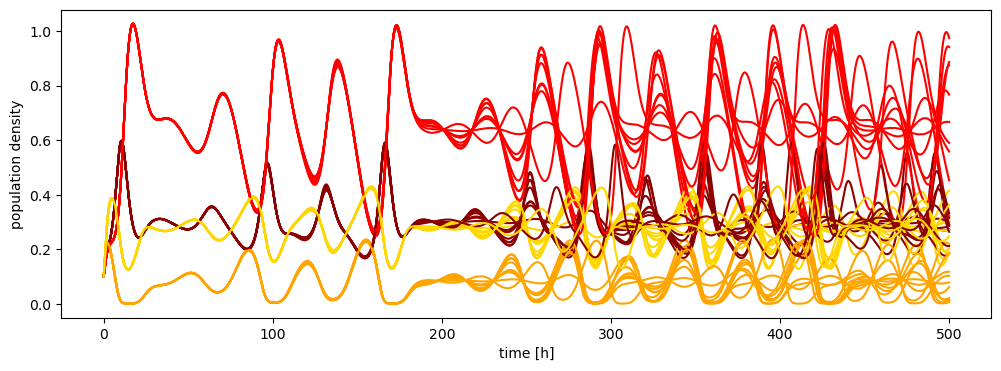

In [20]:
# Define Parameters
n = 4
mu = np.array([1,0.72,1.53,1.27])
alpha = -1*np.array([[1,1.09,1.52,0],
                  [0, 0.72,0.3168,0.9792],
                  [3.5649,0,1.53,0.7191],
                  [1.5367,0.6477,0.4445,1.27]])
    
[fig,axs] = plt.subplots(1,1,figsize=[12,4])
repeats = 10
colors = ['darkred','red','orange','gold']
axs.set_xlabel('time [h]')
axs.set_ylabel('population density')
for i in range(repeats):
    y0 = 0.1*np.ones(n) + np.random.rand(1)*0.001 #equal initial abundance w/ some noise
    # time span
    t = np.linspace(0,500,10000)
    tspan = [t[0],t[-1]]
    # numerical integration
    ode_sol = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,mu*alpha))

    for i in range(n):
        axs.plot(ode_sol.t,ode_sol.y[i],color=colors[i])

#### QUESTION 6: 
6. Expand the simulation time for the above plot to 500 hours.
   * a. Explain what happens?
   * b. What are the implications for our ability to simulate arbitrary ecological dynamics?

### BONUS: Random Models

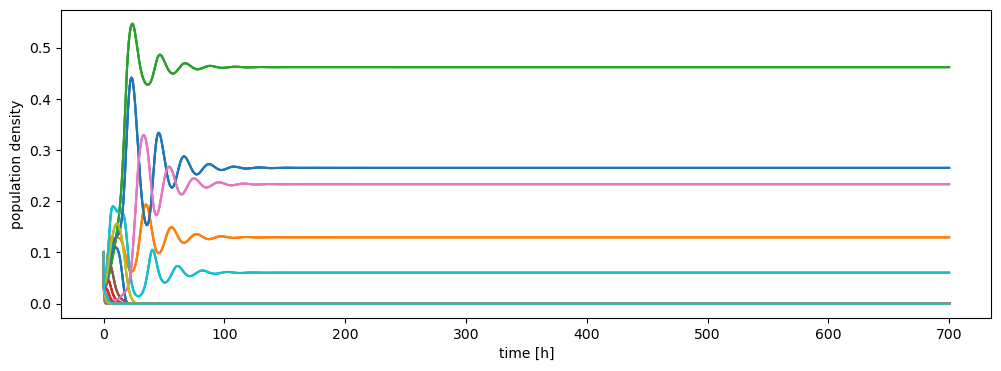

In [42]:
# Random Parameters
# Define Parameters
n = 50
mu = np.random.rand(n)*2
alpha = -1*(np.random.rand(n,n))*3
for i in range(n):
    alpha[i,i] = mu[i]*-1+(np.random.rand(1)[0]-0.5)*0.1
    
[fig,axs] = plt.subplots(1,1,figsize=[12,4])
repeats = 3
axs.set_xlabel('time [h]')
axs.set_ylabel('population density')
for i in range(repeats):
    y0 = 0.1*np.ones(n) + np.random.rand(1)*0.001 #equal initial abundance w/ some noise
    # time span
    t = np.linspace(0,700,10000)
    tspan = [t[0],t[-1]]
    # numerical integration
    ode_sol = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,mu*alpha))

    for i in range(n):
        axs.plot(ode_sol.t,ode_sol.y[i])

In [43]:
name = str(n)

#save figure
image_format = 'svg'
image_name = 'gLV_Art_Gallery/gLV'+name+'.svg'
fig.savefig(image_name, format=image_format, dpi=1200)

#save parameters
np.save('gLV_Art_Gallery/gLV_'+name+'_params_mu', mu)
np.save('gLV_Art_Gallery/gLV_'+name+'_params_alpha', alpha)